* We have 1628 rows (28 columns) for JCV data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import kruskal

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Masterlist_1891763_mhci.csv')
df

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,pair_aff_score,aff_score,sw_immunogenicity_score,sw_antigen_score,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score
0,HLA-A*02:01,LLGDLVATV,7.22,P03095,14.112963,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.267503,...,0.976239,0.978588,0.657334,0.081366,0.782310,0.505745,0.506833,0.792241,0.792241,0.666150
1,HLA-A*02:04,LLGDLVATV,36.64,P03095,16.366396,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.197230,...,0.002350,0.978588,0.657334,0.081366,0.576192,0.001088,0.506833,0.792241,0.792241,0.666150
2,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.000000,0.978588,0.657334,0.081366,0.759667,0.000000,0.506833,0.792241,0.792241,0.666150
3,HLA-A*11:01,ASFAVYTTK,5.76,P03072,21.402530,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.306722,...,0.212965,0.932094,0.705091,0.401144,0.897344,0.146202,0.577166,0.726442,0.726442,0.662342
4,HLA-A*31:01,ASFAVYTTK,88.64,P03072,79.359170,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.161350,...,0.075609,0.932094,0.705091,0.401144,0.470952,0.047776,0.577166,0.726442,0.726442,0.662342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,HLA-A*02:03,DLHAFLSQA,260.93,P03072,194.774477,0.086107,1,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,-0.05387,0.063054,...,0.000000,0.000000,0.501680,0.000000,0.182639,NaN,0.000000,0.087769,0.087769,0.008777
1764,HLA-A*02:03,AIVNSPANL,461.64,P03095,252.175273,0.068057,1,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,-0.13541,0.049181,...,0.000000,0.000000,0.427436,0.000000,0.141948,NaN,0.000000,0.069125,0.069125,0.006913
1765,HLA-A*02:03,GVNAFVNNI,61.24,P03095,95.312442,0.044013,1,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.18089,0.108978,...,0.000000,0.000000,0.715434,0.000000,0.317339,NaN,0.000000,0.044290,0.044290,0.004429
1766,HLA-A*02:03,VITGAPGAV,310.33,P03095,94.179018,0.032937,1,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.12582,0.027785,...,0.000000,0.000000,0.665292,0.087124,0.079191,NaN,0.000000,0.032850,0.032850,0.003285


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   allele                         1768 non-null   object 
 1   peptide                        1768 non-null   object 
 2   iedb_aff                       1768 non-null   float64
 3   protein_id                     1768 non-null   object 
 4   mhcflurry_aff                  1768 non-null   float64
 5   mhcflurry_processing_score     1768 non-null   float64
 6   number_binding_alleles         1768 non-null   int64  
 7   protein_sequence               1768 non-null   object 
 8   immunogenicity_score           1768 non-null   float64
 9   prime_score                    1768 non-null   float64
 10  antigen_score                  1768 non-null   float64
 11  probable_type                  1768 non-null   object 
 12  population_coverage            1768 non-null   f

In [12]:
df.isna().sum()

allele                            0
peptide                           0
iedb_aff                          0
protein_id                        0
mhcflurry_aff                     0
mhcflurry_processing_score        0
number_binding_alleles            0
protein_sequence                  0
immunogenicity_score              0
prime_score                       0
antigen_score                     0
probable_type                     0
population_coverage               0
genot_freq                        0
length                            0
sw_mhcflurry_aff                  0
sw_iedb_aff                       0
genot_freq_sum_per_epitope        0
pair_aff_score                    0
aff_score                         0
sw_immunogenicity_score           0
sw_antigen_score                  0
sw_prime_score                    0
pair_imm_score                   14
imm_score                         0
sw_mhcflurry_processing_score     0
pro_score                         0
rank_score                  

* Pair_imm_score has 12 Naan

In [5]:
len(df['allele'].unique())

72

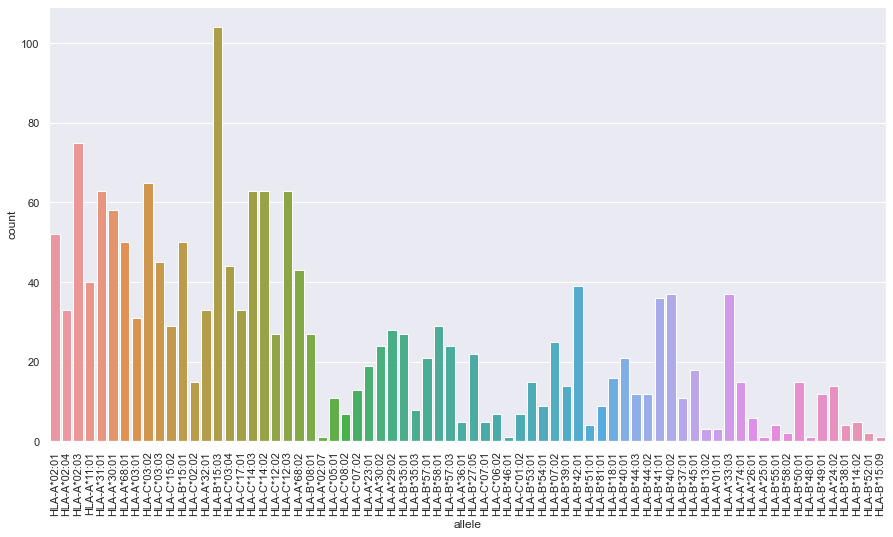

In [3]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'allele', data = df)
plt.xticks(rotation = 90)
plt.show()

In [4]:
df['allele'].value_counts()

HLA-B*15:03    104
HLA-A*02:03     75
HLA-C*03:02     65
HLA-C*14:02     63
HLA-A*31:01     63
              ... 
HLA-A*25:01      1
HLA-B*48:01      1
HLA-B*46:01      1
HLA-A*02:07      1
HLA-B*15:09      1
Name: allele, Length: 72, dtype: int64

In [4]:
len(df['protein_id'].unique())

5

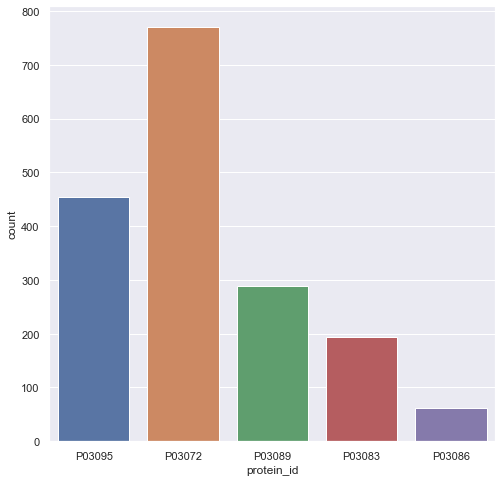

In [5]:
plt.figure(figsize = (8, 8))
sns.countplot(x='protein_id', data=df)
plt.show()

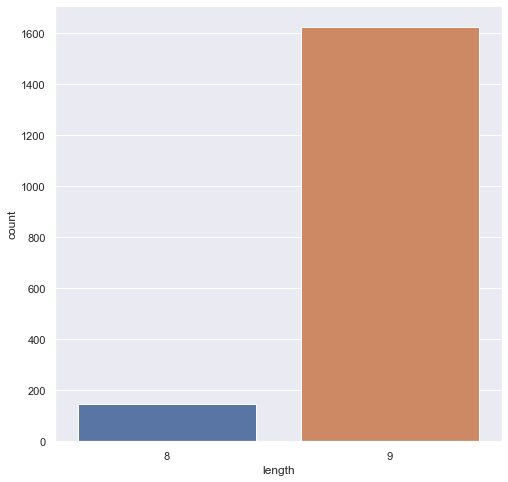

In [6]:
plt.figure(figsize = (8, 8))
sns.countplot(x='length', data=df)
plt.show()

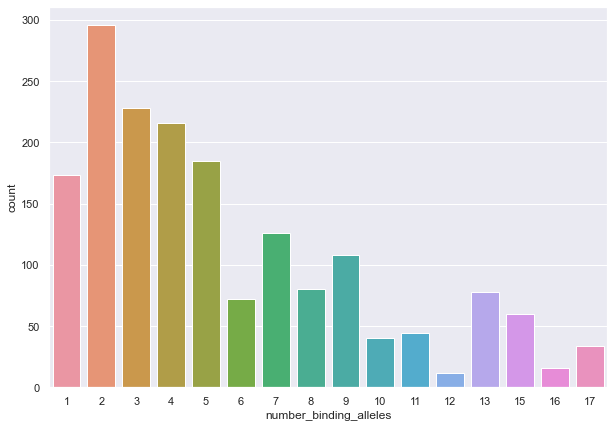

In [5]:
plt.figure(figsize = (10, 7))
sns.countplot(x = 'number_binding_alleles', data = df)
plt.show()

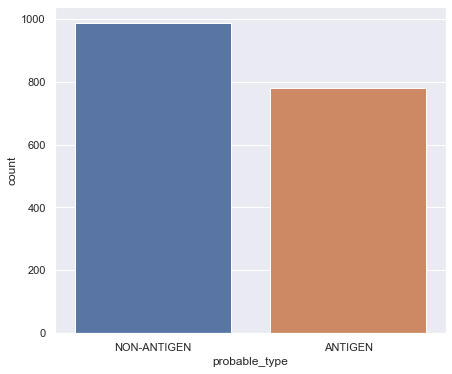

In [8]:
plt.figure(figsize = (7, 6))
sns.countplot(x = 'probable_type', data = df)
plt.show()

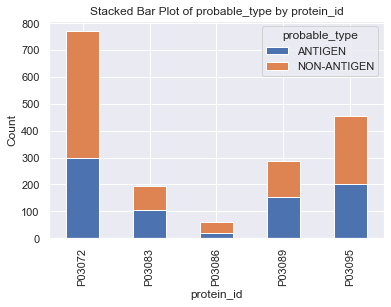

In [6]:
#should we add this?
grouped = df.groupby(['protein_id', 'probable_type']).size().reset_index(name='count')
pivot = grouped.pivot(index='protein_id', columns='probable_type', values='count')
ax = pivot.plot(kind='bar', stacked=True)
ax.set_xlabel('protein_id')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Plot of probable_type by protein_id')

# Show the plot
plt.show()

<AxesSubplot:xlabel='length', ylabel='count'>

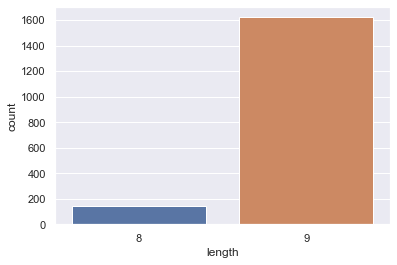

In [7]:
sns.countplot(x = 'length', data = df)

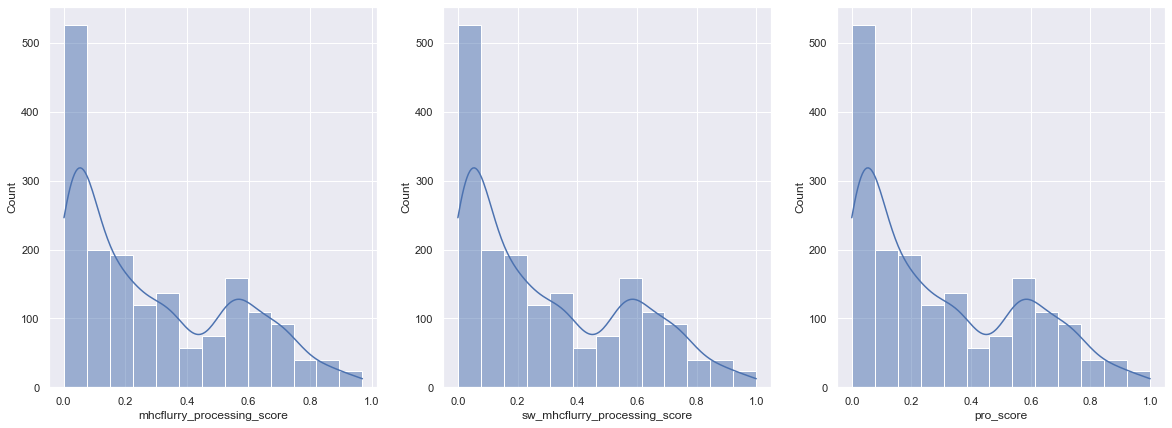

In [10]:
pro_scores = ['mhcflurry_processing_score', 'sw_mhcflurry_processing_score', 'pro_score']

fig, axes = plt.subplots(1,3, figsize = (20, 7)) 

for param, ax in zip(pro_scores, axes.flatten()):
    sns.histplot(data=df, x=param, kde=True, ax = ax)

* Why we got 3 same graphs? (but for covid data we got 3 same graphs too

<AxesSubplot:xlabel='rank_score', ylabel='Count'>

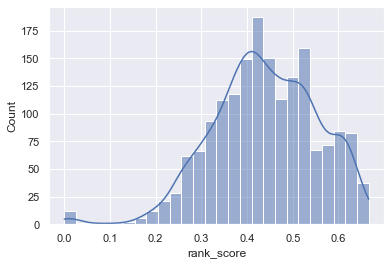

In [20]:
sns.histplot(data=df, x='rank_score', kde=True)

# Important

<AxesSubplot:>

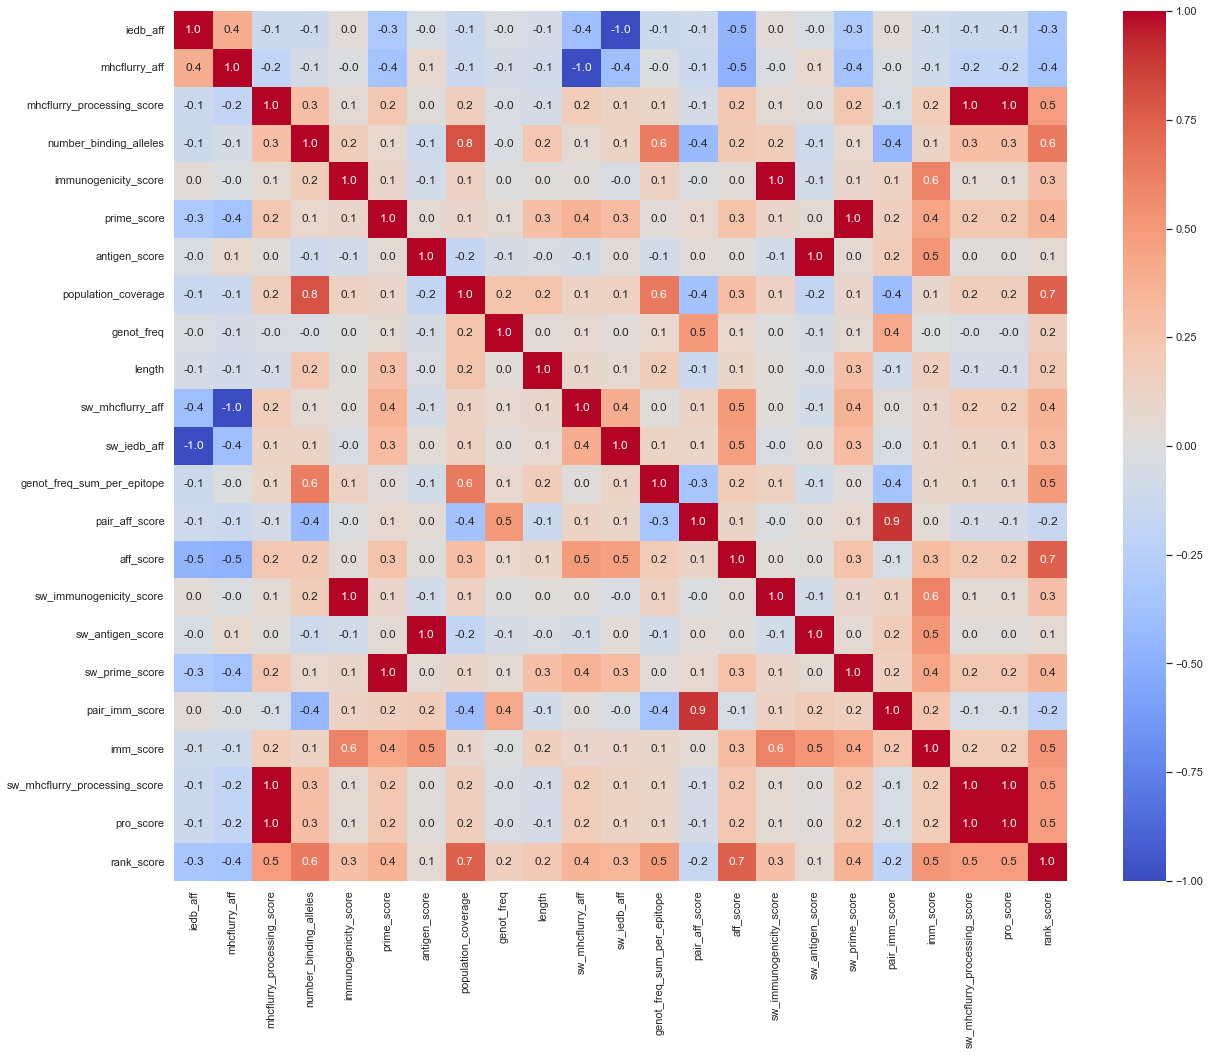

In [21]:
correlation = df.corr()
plt.figure(figsize = (20, 16))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')

* We have high correlation between rank_score and population_coverage, number_binding_alleles; also we have correlation 0.5 between rank score mhcflurry_preprocessing_score, imm_score, sw_mhflurry_processing_score and pro_score
And significant negative correlation between rank_score and iedb_aff and mhcflurry_aff????
* Pro score has 3 same columns (corr = 1)?
* what are formulas for sw?

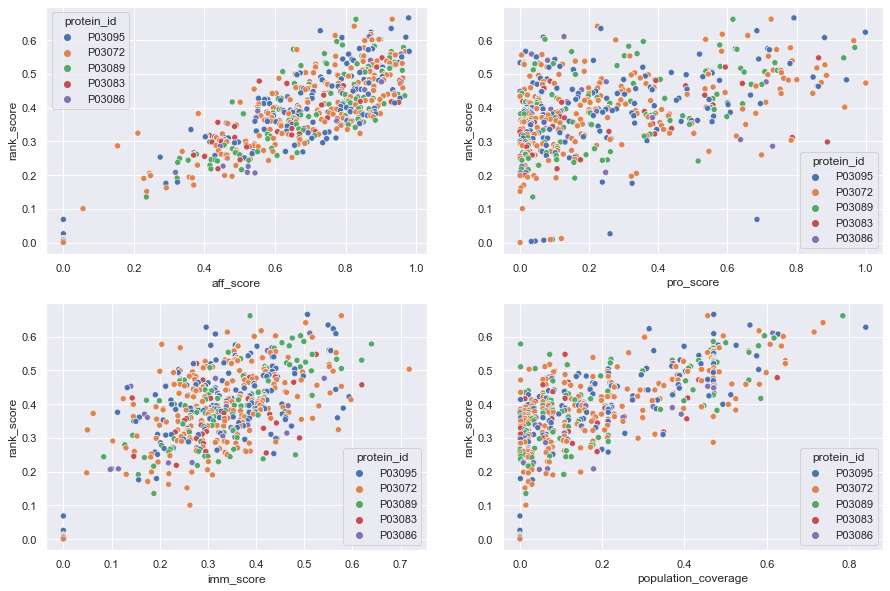

In [16]:
rank_formula_features = ['aff_score', 'pro_score', 'imm_score', 'population_coverage']

fig, axes = plt.subplots(2,2, figsize = (15, 10)) 

for param, ax in zip(rank_formula_features, axes.flatten()):
    sns.scatterplot(data = df, x =param, y = 'rank_score', hue = 'protein_id', ax = ax)


In [11]:
def binding_alleles_range(number):
    if number == 1:
        return '1'
    elif number == 2:
        return '2'
    elif number>=3 and number <= 8:
        return '3-8'
    elif number >= 9 and number <= 15:
        return '9-15'
    else:
        return '16+'
    
df['binding_alleles_range'] = df['number_binding_alleles'].apply(binding_alleles_range)
df.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,aff_score,sw_immunogenicity_score,sw_antigen_score,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,binding_alleles_range
0,HLA-A*02:01,LLGDLVATV,7.22,P03095,14.112963,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.267503,...,0.978588,0.657334,0.081366,0.782310,0.505745,0.506833,0.792241,0.792241,0.666150,3-8
1,HLA-A*02:04,LLGDLVATV,36.64,P03095,16.366396,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.197230,...,0.978588,0.657334,0.081366,0.576192,0.001088,0.506833,0.792241,0.792241,0.666150,3-8
2,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.978588,0.657334,0.081366,0.759667,0.000000,0.506833,0.792241,0.792241,0.666150,3-8
3,HLA-A*11:01,ASFAVYTTK,5.76,P03072,21.402530,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.306722,...,0.932094,0.705091,0.401144,0.897344,0.146202,0.577166,0.726442,0.726442,0.662342,3-8
4,HLA-A*31:01,ASFAVYTTK,88.64,P03072,79.359170,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.161350,...,0.932094,0.705091,0.401144,0.470952,0.047776,0.577166,0.726442,0.726442,0.662342,3-8


<AxesSubplot:xlabel='pair_aff_score', ylabel='pair_imm_score'>

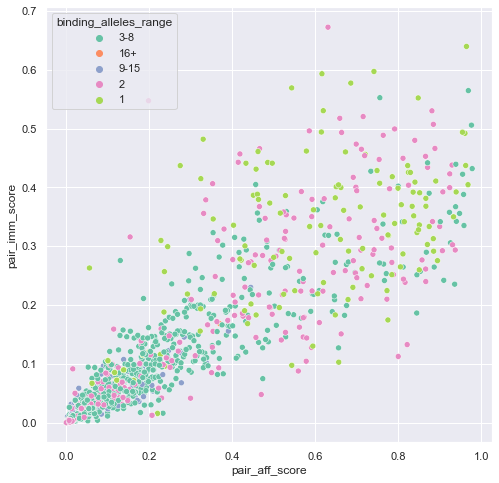

In [24]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df, x ='pair_aff_score', y = 'pair_imm_score', hue = 'binding_alleles_range', palette = 'Set2')

<AxesSubplot:xlabel='mean_pair_aff_score_epi', ylabel='aff_score'>

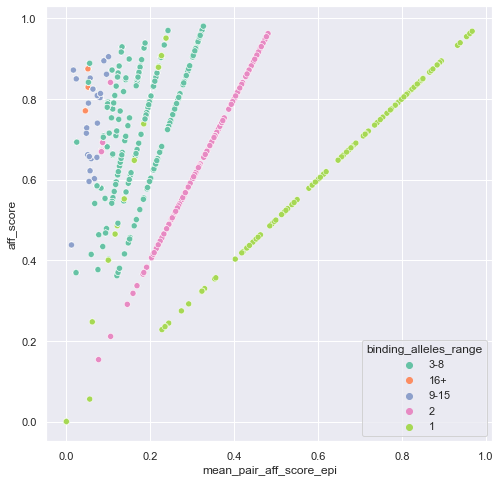

In [27]:
x= df.groupby(by=['peptide'])['pair_aff_score'].mean()
df2= pd.merge(df, x, how='inner', left_on = 'peptide', right_on = 'peptide')
df2.rename(columns={'pair_aff_score_y':'mean_pair_aff_score_epi'}, inplace=True)

#important - added on pair_aff slide
plt.figure(figsize = (8,8))
sns.scatterplot(data = df2, x ='mean_pair_aff_score_epi', y = 'aff_score', hue = 'binding_alleles_range', palette = 'Set2')

In [13]:
y= df.groupby(by=['peptide'])['pair_imm_score'].mean()
df3= pd.merge(df, y, how='inner', left_on = 'peptide', right_on = 'peptide')
df3.rename(columns={'pair_imm_score_y':'mean_pair_imm_score_epi'}, inplace=True)

<AxesSubplot:xlabel='mean_pair_imm_score_epi', ylabel='imm_score'>

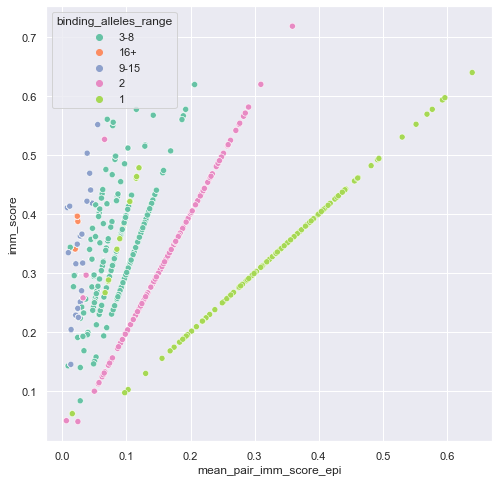

In [14]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df3, x ='mean_pair_imm_score_epi', y = 'imm_score', hue = 'binding_alleles_range',  palette = 'Set2')

In [27]:
# Important because of tools
df['diff_bw_iedb_aff_mhcflurry_aff'] = np.abs(df['iedb_aff'] - df['mhcflurry_aff'])

def labelquartile(diff):
    if diff <= np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.25):
        return 'Less than 25%'
    elif diff > np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.25) and diff <=  np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.5):
        return 'Less than 50%'
    elif diff > np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.5) and diff <= np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.75):
        return 'Less than 75%'
    else:
        return 'Greater than 75%'
    
df['Affinity_Quantile'] = df['diff_bw_iedb_aff_mhcflurry_aff'].apply(labelquartile)
df.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,binding_alleles_range,allele_type,diff_bw_iedb_aff_mhcflurry_aff,Affinity_Quantile
0,HLA-A*02:01,LLGDLVATV,7.22,P03095,14.112963,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.267503,...,0.782310,0.505745,0.506833,0.792241,0.792241,0.666150,3-8,A,6.892963,Less than 25%
1,HLA-A*02:04,LLGDLVATV,36.64,P03095,16.366396,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.197230,...,0.576192,0.001088,0.506833,0.792241,0.792241,0.666150,3-8,A,20.273604,Less than 25%
2,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.759667,0.000000,0.506833,0.792241,0.792241,0.666150,3-8,A,6.790043,Less than 25%
3,HLA-A*11:01,ASFAVYTTK,5.76,P03072,21.402530,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.306722,...,0.897344,0.146202,0.577166,0.726442,0.726442,0.662342,3-8,A,15.642530,Less than 25%
4,HLA-A*31:01,ASFAVYTTK,88.64,P03072,79.359170,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.161350,...,0.470952,0.047776,0.577166,0.726442,0.726442,0.662342,3-8,A,9.280830,Less than 25%


<AxesSubplot:xlabel='iedb_aff', ylabel='mhcflurry_aff'>

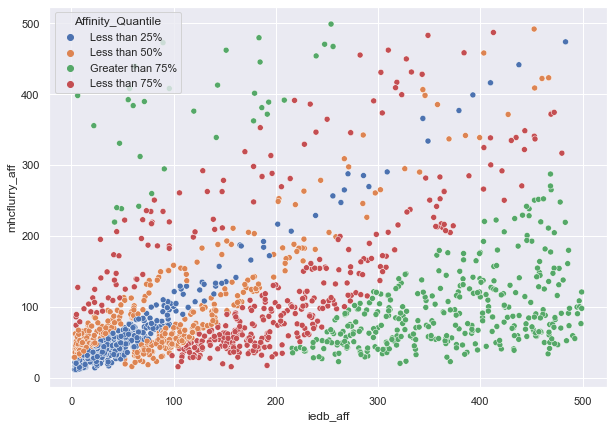

In [13]:
#important - added on iedb_aff & mhcflurry_aff slide
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df, x = 'iedb_aff', y = 'mhcflurry_aff', hue = 'Affinity_Quantile')

<AxesSubplot:ylabel='diff_bw_iedb_aff_mhcflurry_aff'>

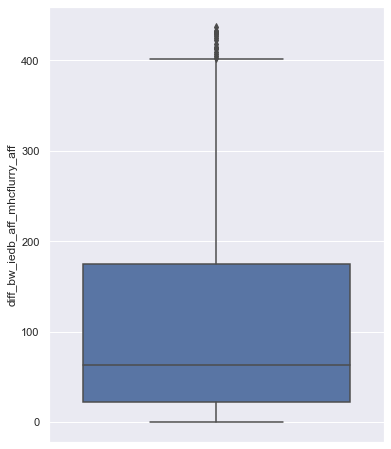

In [14]:
plt.figure(figsize = (6, 8))
sns.boxplot(data = df, y = 'diff_bw_iedb_aff_mhcflurry_aff')

<AxesSubplot:xlabel='length', ylabel='diff_bw_iedb_aff_mhcflurry_aff'>

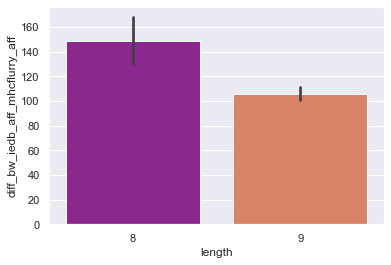

In [15]:
sns.barplot(x ='length', y ='diff_bw_iedb_aff_mhcflurry_aff', data = df,
            palette ='plasma')

<AxesSubplot:xlabel='protein_id', ylabel='diff_bw_iedb_aff_mhcflurry_aff'>

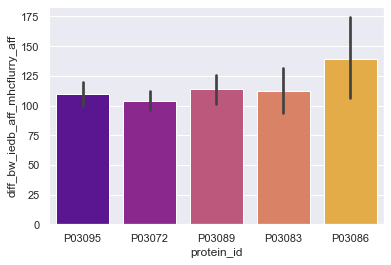

In [16]:
sns.barplot(x ='protein_id', y ='diff_bw_iedb_aff_mhcflurry_aff', data = df,
            palette ='plasma')

Null Hypothesis (Ho) : IEDB_aff & MHCFlurry_aff vary uniformly. Alternate Hypothesis (Ha): IEDB_aff & MHCFlurry_aff does not vary uniformly. Level of significane(Alpha) = 0.05

In [21]:
kruskal(df['iedb_aff'], df['mhcflurry_aff'])

KruskalResult(statistic=141.4749813553303, pvalue=1.266721249654837e-32)

As p<Alpha, Ho is rejected. That means IEDB_aff & MHCFlurry_aff  does not vary uniformly.

<Axes: xlabel='number_binding_alleles', ylabel='population_coverage'>

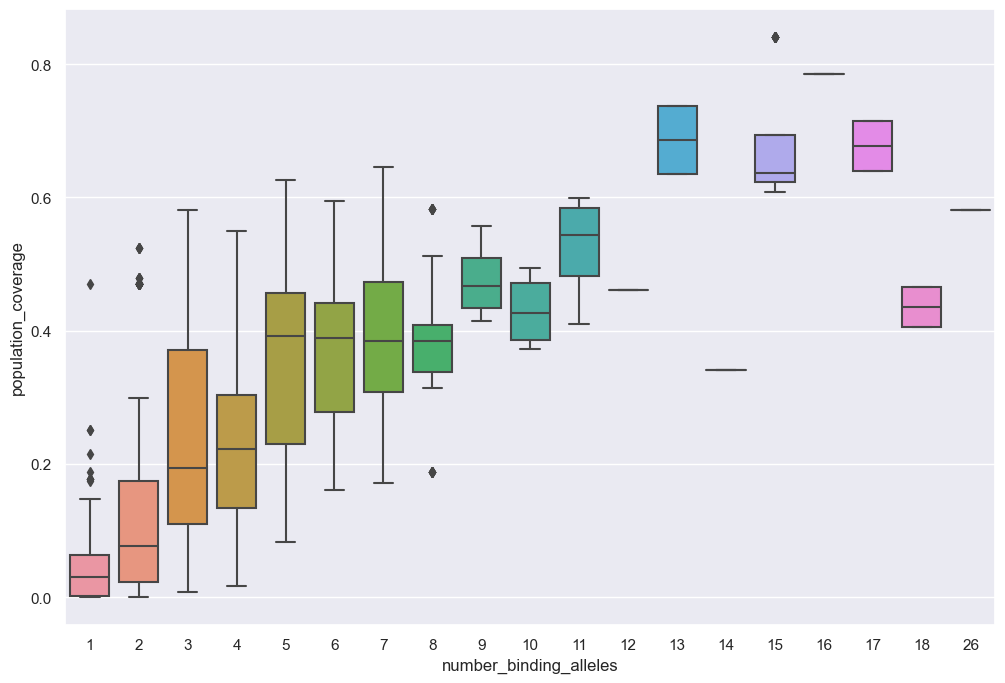

In [58]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'number_binding_alleles', y = 'population_coverage', data = df)

<Axes: xlabel='number_binding_alleles', ylabel='genot_freq_sum_per_epitope'>

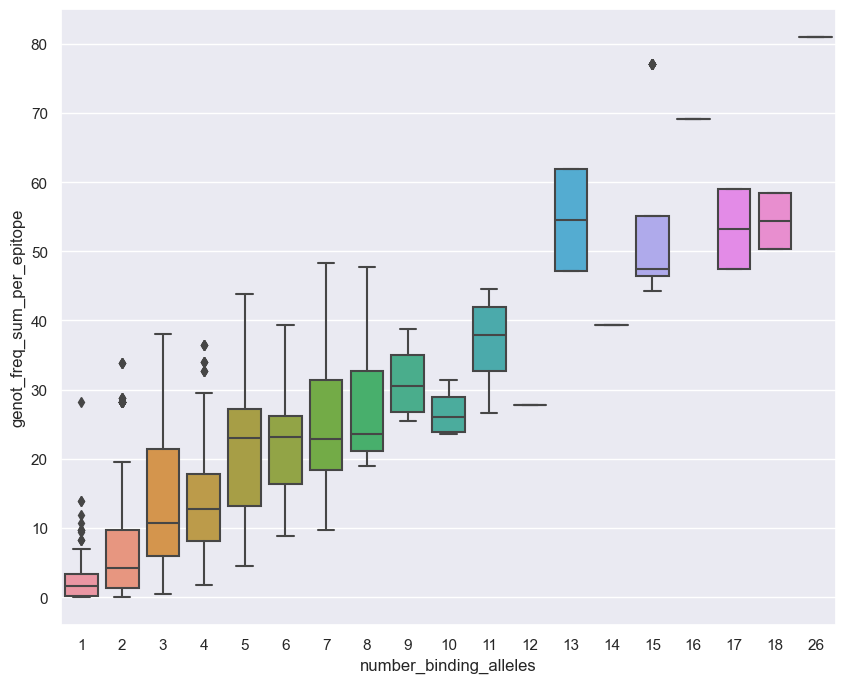

In [59]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'number_binding_alleles', y = 'genot_freq_sum_per_epitope', data = df)

In [4]:
df['genot/pop'] = df['genot_freq_sum_per_epitope']/(df['population_coverage']*100)
df.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,aff_score,sw_immunogenicity_score,sw_antigen_score,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,genot/pop
0,HLA-A*02:01,LLGDLVATV,7.22,P03095,14.112963,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.267503,...,0.978588,0.657334,0.081366,0.782310,0.505745,0.506833,0.792241,0.792241,0.666150,0.598938
1,HLA-A*02:04,LLGDLVATV,36.64,P03095,16.366396,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.197230,...,0.978588,0.657334,0.081366,0.576192,0.001088,0.506833,0.792241,0.792241,0.666150,0.598938
2,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.978588,0.657334,0.081366,0.759667,0.000000,0.506833,0.792241,0.792241,0.666150,0.598938
3,HLA-A*11:01,ASFAVYTTK,5.76,P03072,21.402530,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.306722,...,0.932094,0.705091,0.401144,0.897344,0.146202,0.577166,0.726442,0.726442,0.662342,0.595530
4,HLA-A*31:01,ASFAVYTTK,88.64,P03072,79.359170,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.161350,...,0.932094,0.705091,0.401144,0.470952,0.047776,0.577166,0.726442,0.726442,0.662342,0.595530


<AxesSubplot:xlabel='genot/pop'>

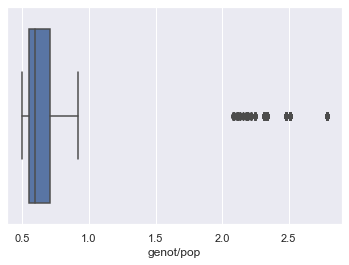

In [4]:
sns.boxplot(df['genot/pop'])

<AxesSubplot:xlabel='genot/pop', ylabel='Count'>

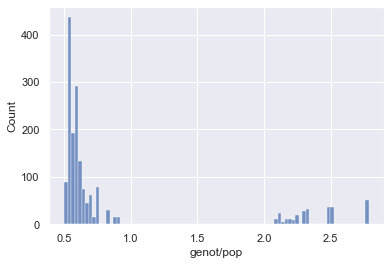

In [8]:
sns.histplot(df['genot/pop'])

In [5]:
def genot_pop_ratio(ratio):
    if ratio <= 1:
        return 'Less than 1'
    else:
        return 'Greater than 2'
    
df['genot_pop_ratio'] = df['genot/pop'].apply(genot_pop_ratio)
df.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,sw_immunogenicity_score,sw_antigen_score,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,genot/pop,genot_pop_ratio
0,HLA-A*02:01,LLGDLVATV,7.22,P03095,14.112963,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.267503,...,0.657334,0.081366,0.782310,0.505745,0.506833,0.792241,0.792241,0.666150,0.598938,Less than 1
1,HLA-A*02:04,LLGDLVATV,36.64,P03095,16.366396,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.197230,...,0.657334,0.081366,0.576192,0.001088,0.506833,0.792241,0.792241,0.666150,0.598938,Less than 1
2,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.657334,0.081366,0.759667,0.000000,0.506833,0.792241,0.792241,0.666150,0.598938,Less than 1
3,HLA-A*11:01,ASFAVYTTK,5.76,P03072,21.402530,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.306722,...,0.705091,0.401144,0.897344,0.146202,0.577166,0.726442,0.726442,0.662342,0.595530,Less than 1
4,HLA-A*31:01,ASFAVYTTK,88.64,P03072,79.359170,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.161350,...,0.705091,0.401144,0.470952,0.047776,0.577166,0.726442,0.726442,0.662342,0.595530,Less than 1


<AxesSubplot:xlabel='population_coverage', ylabel='genot_freq_sum_per_epitope'>

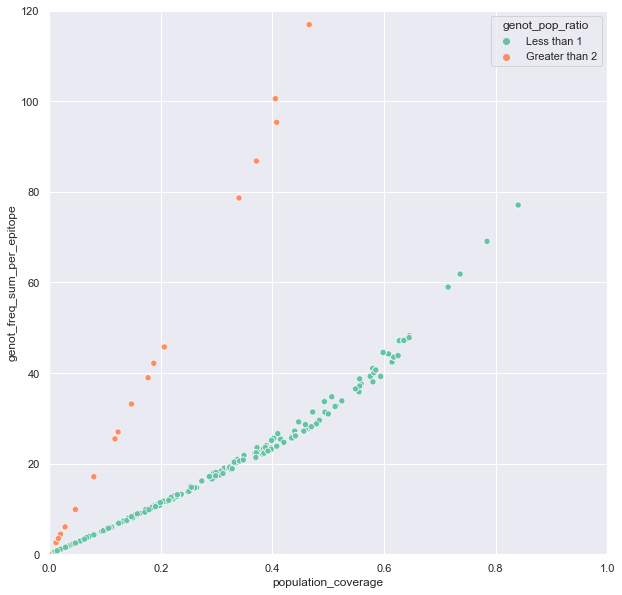

In [7]:
plt.figure(figsize = (10, 10))
plt.xlim([0,1])
plt.ylim([0,120])
sns.scatterplot(data = df, x = 'population_coverage', y = 'genot_freq_sum_per_epitope', hue = 'genot_pop_ratio',
                palette = 'Set2')

For JCV, the variation depends on the ratio between genot_freq_sum_per_epitope & population_coverage.
Here the ratio range is (0,1) U (2,3).
If the ratio <= 1, then it follows a non-linear relationship.
If the ratio >= 2, the relationship becomes linear.
What causes the ratio to increase over 2 is still unclear.


In [8]:
df_less_1 = df[df['genot_pop_ratio'] == 'Less than 1']
df_less_1.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,sw_immunogenicity_score,sw_antigen_score,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,genot/pop,genot_pop_ratio
0,HLA-A*02:01,LLGDLVATV,7.22,P03095,14.112963,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.267503,...,0.657334,0.081366,0.782310,0.505745,0.506833,0.792241,0.792241,0.666150,0.598938,Less than 1
1,HLA-A*02:04,LLGDLVATV,36.64,P03095,16.366396,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.197230,...,0.657334,0.081366,0.576192,0.001088,0.506833,0.792241,0.792241,0.666150,0.598938,Less than 1
2,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.657334,0.081366,0.759667,0.000000,0.506833,0.792241,0.792241,0.666150,0.598938,Less than 1
3,HLA-A*11:01,ASFAVYTTK,5.76,P03072,21.402530,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.306722,...,0.705091,0.401144,0.897344,0.146202,0.577166,0.726442,0.726442,0.662342,0.595530,Less than 1
4,HLA-A*31:01,ASFAVYTTK,88.64,P03072,79.359170,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.161350,...,0.705091,0.401144,0.470952,0.047776,0.577166,0.726442,0.726442,0.662342,0.595530,Less than 1


In [12]:
df_less_1['allele'].unique()

array(['HLA-A*02:01', 'HLA-A*02:04', 'HLA-A*02:03', 'HLA-A*11:01',
       'HLA-A*31:01', 'HLA-A*30:01', 'HLA-A*68:01', 'HLA-A*03:01',
       'HLA-C*03:02', 'HLA-C*03:03', 'HLA-C*15:02', 'HLA-B*15:01',
       'HLA-C*02:02', 'HLA-A*32:01', 'HLA-B*15:03', 'HLA-C*03:04',
       'HLA-C*17:01', 'HLA-C*14:03', 'HLA-C*14:02', 'HLA-C*12:02',
       'HLA-C*12:03', 'HLA-A*68:02', 'HLA-B*08:01', 'HLA-A*02:07',
       'HLA-C*05:01', 'HLA-C*08:02', 'HLA-C*07:02', 'HLA-A*23:01',
       'HLA-A*30:02', 'HLA-A*29:02', 'HLA-B*35:01', 'HLA-B*57:01',
       'HLA-B*58:01', 'HLA-B*57:03', 'HLA-A*36:01', 'HLA-B*27:05',
       'HLA-C*07:01', 'HLA-C*06:02', 'HLA-B*46:01', 'HLA-C*01:02',
       'HLA-B*53:01', 'HLA-B*54:01', 'HLA-B*07:02', 'HLA-B*35:03',
       'HLA-B*39:01', 'HLA-B*42:01', 'HLA-B*51:01', 'HLA-B*81:01',
       'HLA-B*18:01', 'HLA-B*40:01', 'HLA-B*44:03', 'HLA-B*44:02',
       'HLA-B*41:01', 'HLA-B*40:02', 'HLA-B*37:01', 'HLA-B*45:01',
       'HLA-B*13:02', 'HLA-A*01:01', 'HLA-A*33:03', 'HLA-A*74:

In [13]:
len(df_less_1['allele'].unique())

72

In [9]:
df_greater_2 = df[df['genot_pop_ratio'] == 'Greater than 2']
df_greater_2.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,sw_immunogenicity_score,sw_antigen_score,sw_prime_score,pair_imm_score,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,genot/pop,genot_pop_ratio
67,HLA-B*15:03,SAWGNIPVM,35.06,P03083,149.126294,0.567478,13,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.23974,0.067657,...,0.769019,0.019181,0.196140,0.000182,0.410782,0.58497,0.58497,0.61757,2.786648,Greater than 2
68,HLA-C*03:04,SAWGNIPVM,8.55,P03083,32.412250,0.567478,13,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.23974,0.123118,...,0.769019,0.019181,0.358813,0.014188,0.410782,0.58497,0.58497,0.61757,2.786648,Greater than 2
69,HLA-C*12:03,SAWGNIPVM,14.54,P03072,33.767219,0.567478,13,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.23974,0.223765,...,0.769019,0.019181,0.654022,0.024607,0.410782,0.58497,0.58497,0.61757,2.786648,Greater than 2
70,HLA-C*12:03,SAWGNIPVM,14.54,P03083,33.767219,0.567478,13,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.23974,0.223765,...,0.769019,0.019181,0.654022,0.024607,0.410782,0.58497,0.58497,0.61757,2.786648,Greater than 2
71,HLA-C*12:03,SAWGNIPVM,14.54,P03083,33.767219,0.567478,13,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.23974,0.223765,...,0.769019,0.019181,0.654022,0.024607,0.410782,0.58497,0.58497,0.61757,2.786648,Greater than 2


In [14]:
len(df_greater_2['allele'].unique())

40

In [11]:
df_merge = pd.merge(df_less_1, df_greater_2, on = 'allele', how = 'inner')
df_merge

,allele,peptide_x,iedb_aff_x,protein_id_x,mhcflurry_aff_x,mhcflurry_processing_score_x,number_binding_alleles_x,protein_sequence_x,immunogenicity_score_x,prime_score_x,...,sw_immunogenicity_score_y,sw_antigen_score_y,sw_prime_score_y,pair_imm_score_y,imm_score_y,sw_mhcflurry_processing_score_y,pro_score_y,rank_score_y,genot/pop_y,genot_pop_ratio_y
0,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.886112,0.032460,0.018549,0.000000,0.334476,0.030414,0.030414,0.356427,2.479290,Greater than 2
1,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.886112,0.032460,0.018549,0.000000,0.334476,0.030414,0.030414,0.356427,2.479290,Greater than 2
2,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.886112,0.032460,0.018549,0.000000,0.334476,0.030414,0.030414,0.356427,2.479290,Greater than 2
3,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.886112,0.032460,0.018549,0.000000,0.334476,0.030414,0.030414,0.356427,2.479290,Greater than 2
4,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.616624,0.054844,0.126625,NaN,0.000000,0.685418,0.685418,0.068542,NaN,Greater than 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10193,HLA-B*49:01,QENCTFHI,397.11,P03072,119.779984,0.050521,3,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.11895,0.014143,...,0.406230,0.365949,0.333184,0.006372,0.343628,0.026676,0.026676,0.415693,2.311581,Greater than 2
10194,HLA-B*14:02,RKFLRSSPL,183.08,P03083,131.949482,0.170499,3,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,-0.22459,0.081356,...,0.253936,0.308730,0.635497,0.014837,0.296363,0.360141,0.360141,0.388600,2.214908,Greater than 2
10195,HLA-B*14:02,RKFLRSSPL,183.08,P03083,131.949482,0.170499,3,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,-0.22459,0.081356,...,0.253936,0.308730,0.635497,0.014837,0.296363,0.360141,0.360141,0.388600,2.214908,Greater than 2
10196,HLA-B*14:02,RKFLRSSPL,183.08,P03083,131.949482,0.170499,3,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,-0.22459,0.081356,...,0.253936,0.308730,0.635497,0.014837,0.296363,0.360141,0.360141,0.388600,2.214908,Greater than 2


In [15]:
df_merge['allele'].unique()

array(['HLA-A*02:03', 'HLA-A*11:01', 'HLA-A*31:01', 'HLA-A*30:01',
       'HLA-A*03:01', 'HLA-C*03:02', 'HLA-C*03:03', 'HLA-C*15:02',
       'HLA-B*15:01', 'HLA-C*02:02', 'HLA-A*32:01', 'HLA-B*15:03',
       'HLA-C*03:04', 'HLA-C*17:01', 'HLA-C*14:03', 'HLA-C*14:02',
       'HLA-C*12:02', 'HLA-C*12:03', 'HLA-A*68:02', 'HLA-B*08:01',
       'HLA-A*30:02', 'HLA-A*29:02', 'HLA-B*35:01', 'HLA-B*27:05',
       'HLA-B*07:02', 'HLA-B*35:03', 'HLA-B*39:01', 'HLA-B*42:01',
       'HLA-B*81:01', 'HLA-B*18:01', 'HLA-B*40:01', 'HLA-B*44:03',
       'HLA-B*44:02', 'HLA-B*41:01', 'HLA-B*40:02', 'HLA-B*37:01',
       'HLA-B*45:01', 'HLA-A*74:01', 'HLA-B*49:01', 'HLA-B*14:02'],
      dtype=object)

In [16]:
len(df_merge['allele'].unique())

40

Over 55.55% alleles are present in both groups. So it is not depending on alleles

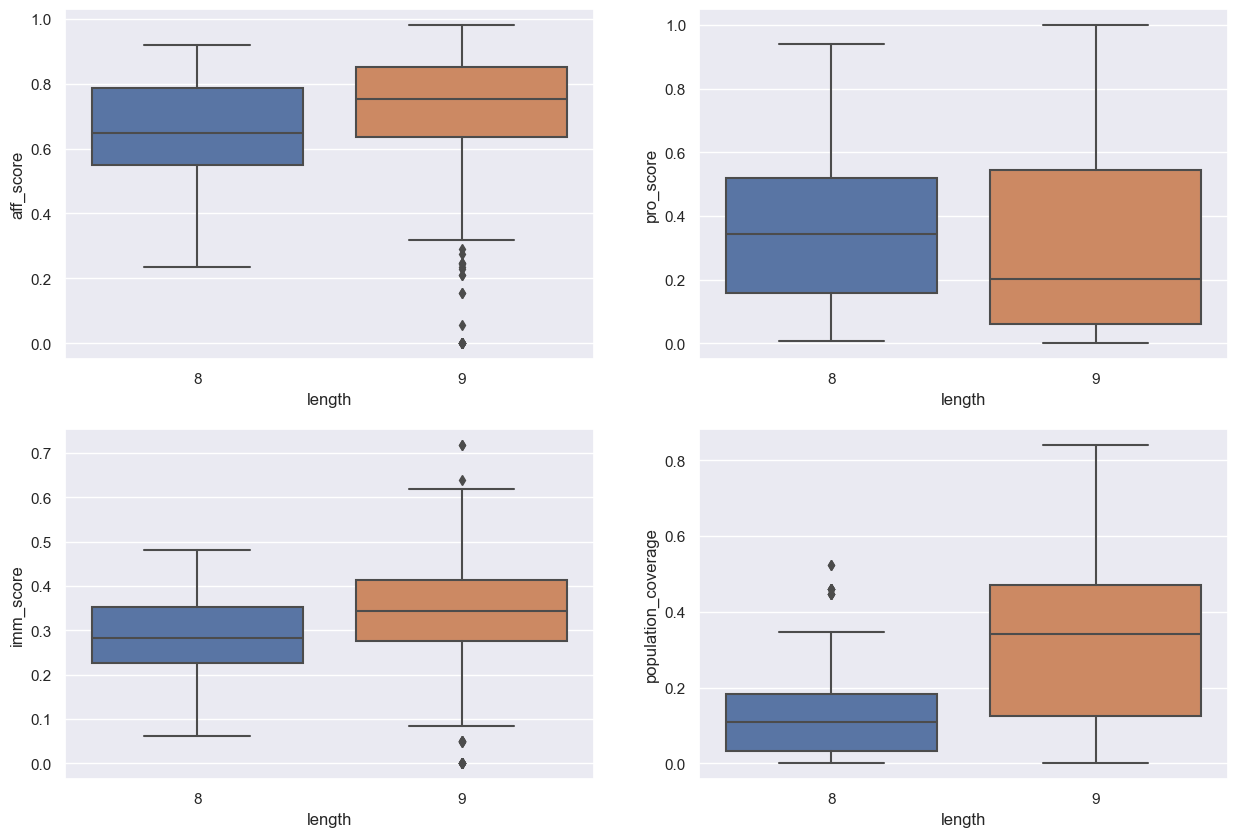

In [62]:
fig, axes = plt.subplots(2,2, figsize = (15, 10)) 

for param, ax in zip(rank_formula_features, axes.flatten()):
    sns.boxplot(data=df, x='length', y=param, ax = ax)

<AxesSubplot:xlabel='length', ylabel='rank_score'>

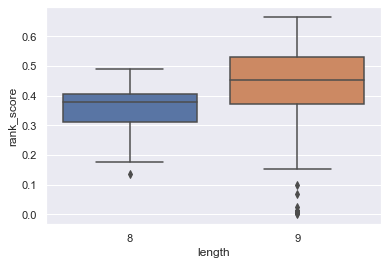

In [19]:
sns.boxplot(data=df, x='length', y='rank_score')

In [28]:
df['diff_bw_immunogenicity_score_prime_score'] = np.abs(df['immunogenicity_score'] - df['prime_score'])

def labelquartile(diff):
    if diff <= np.quantile(df['diff_bw_immunogenicity_score_prime_score'], 0.25):
        return 'Less than 25%'
    elif diff > np.quantile(df['diff_bw_immunogenicity_score_prime_score'], 0.25) and diff <=  np.quantile(df['diff_bw_immunogenicity_score_prime_score'], 0.5):
        return 'Less than 50%'
    elif diff > np.quantile(df['diff_bw_immunogenicity_score_prime_score'], 0.5) and diff <= np.quantile(df['diff_bw_immunogenicity_score_prime_score'], 0.75):
        return 'Less than 75%'
    else:
        return 'Greater than 75%'
    
df['Immunogenicity_Quantile'] = df['diff_bw_immunogenicity_score_prime_score'].apply(labelquartile)
df.head()

,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,number_binding_alleles,protein_sequence,immunogenicity_score,prime_score,...,imm_score,sw_mhcflurry_processing_score,pro_score,rank_score,binding_alleles_range,allele_type,diff_bw_iedb_aff_mhcflurry_aff,Affinity_Quantile,diff_bw_immunogenicity_score_prime_score,Immunogenicity_Quantile
0,HLA-A*02:01,LLGDLVATV,7.22,P03095,14.112963,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.267503,...,0.506833,0.792241,0.792241,0.666150,3-8,A,6.892963,Less than 25%,0.150423,Less than 50%
1,HLA-A*02:04,LLGDLVATV,36.64,P03095,16.366396,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.197230,...,0.506833,0.792241,0.792241,0.666150,3-8,A,20.273604,Less than 25%,0.080150,Less than 25%
2,HLA-A*02:03,LLGDLVATV,3.86,P03095,10.650043,0.768149,3,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.11708,0.259783,...,0.506833,0.792241,0.792241,0.666150,3-8,A,6.790043,Less than 25%,0.142703,Less than 50%
3,HLA-A*11:01,ASFAVYTTK,5.76,P03072,21.402530,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.306722,...,0.577166,0.726442,0.726442,0.662342,3-8,A,15.642530,Less than 25%,0.137192,Less than 50%
4,HLA-A*31:01,ASFAVYTTK,88.64,P03072,79.359170,0.704445,5,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.16953,0.161350,...,0.577166,0.726442,0.726442,0.662342,3-8,A,9.280830,Less than 25%,0.008180,Less than 25%


<Axes: xlabel='immunogenicity_score', ylabel='prime_score'>

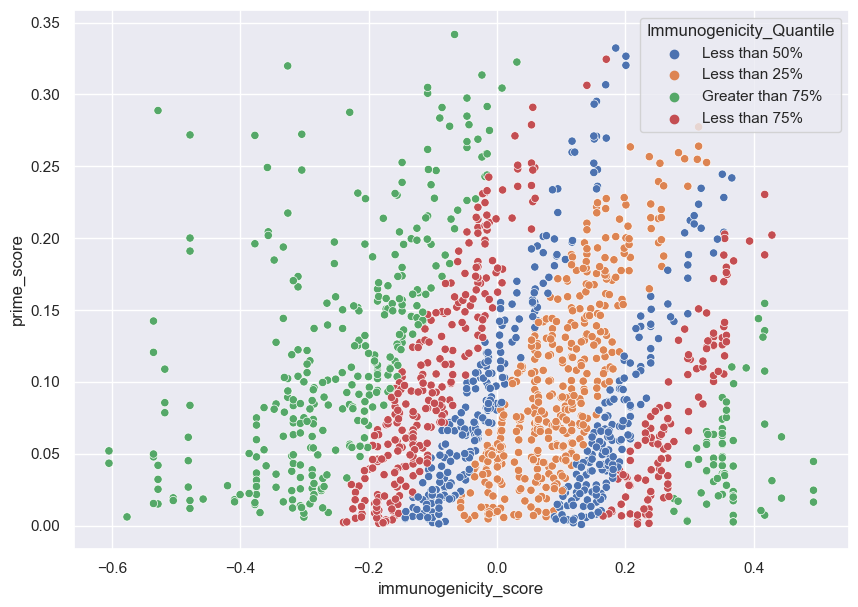

In [65]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df, x = 'immunogenicity_score', y = 'prime_score', hue = 'Immunogenicity_Quantile')

<Axes: ylabel='diff_bw_immunogenicity_score_prime_score'>

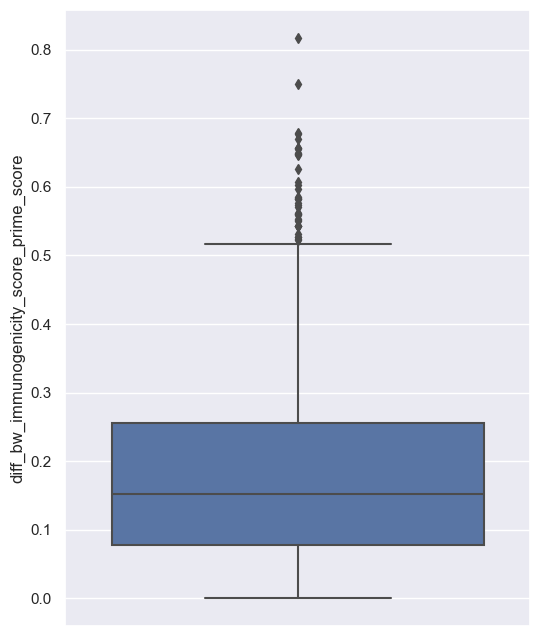

In [66]:
plt.figure(figsize = (6, 8))
sns.boxplot(data = df, y = 'diff_bw_immunogenicity_score_prime_score')

<Axes: xlabel='length', ylabel='diff_bw_immunogenicity_score_prime_score'>

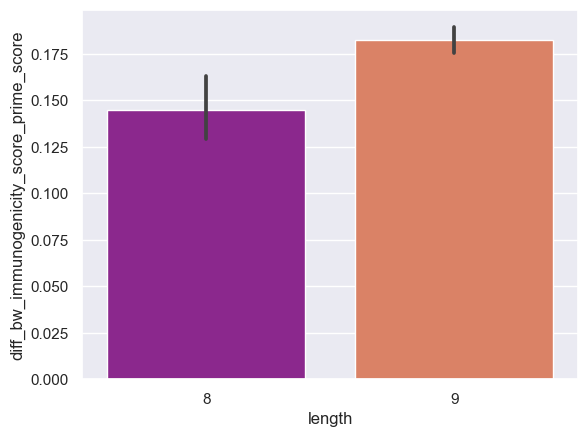

In [67]:
sns.barplot(x ='length', y ='diff_bw_immunogenicity_score_prime_score', data = df,
            palette ='plasma')

<Axes: xlabel='protein_id', ylabel='diff_bw_immunogenicity_score_prime_score'>

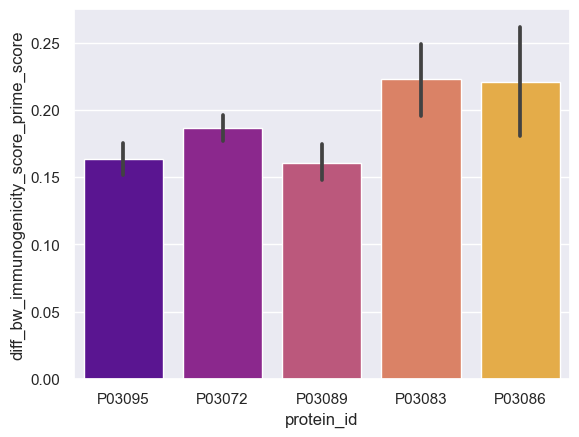

In [68]:
sns.barplot(x ='protein_id', y ='diff_bw_immunogenicity_score_prime_score', data = df,
            palette ='plasma')

In [22]:
kruskal(df['immunogenicity_score'], df['prime_score'])

KruskalResult(statistic=179.3357888724356, pvalue=6.76777641403202e-41)

As p<Alpha, Ho is rejected. That means Immunogenicity_score & Prime_score does not vary uniformly.

In [7]:
#SCORES SUMMARY for 30 top-ranked epitopes
top_ep_scores = df.groupby(['peptide'])['rank_score', 'imm_score', 'aff_score',  'population_coverage', 'pro_score'].max().sort_values(by='rank_score', ascending = False)[:30]
top_ep_scores

,rank_score,imm_score,aff_score,population_coverage,pro_score
peptide,,,,,
LLGDLVATV,0.666150,0.506833,0.978588,0.4710,0.792241
ASFAVYTTK,0.662342,0.577166,0.932094,0.4564,0.726442
RVFEGTEEL,0.662049,0.387508,0.829230,0.7848,0.615875
MLVERFNFL,0.641598,0.502982,0.824376,0.7366,0.224104
FLEETTWAI,0.634774,0.549580,0.929213,0.5591,0.234059
YISDYYSRL,0.628107,0.296451,0.728270,0.8406,0.685107
TYISFGHSY,0.623690,0.560367,0.871604,0.3141,0.998688
SAWGNIPVM,0.617570,0.410782,0.871593,0.5812,0.584970
RTVASFAVY,0.613756,0.340621,0.770545,0.7151,0.658763


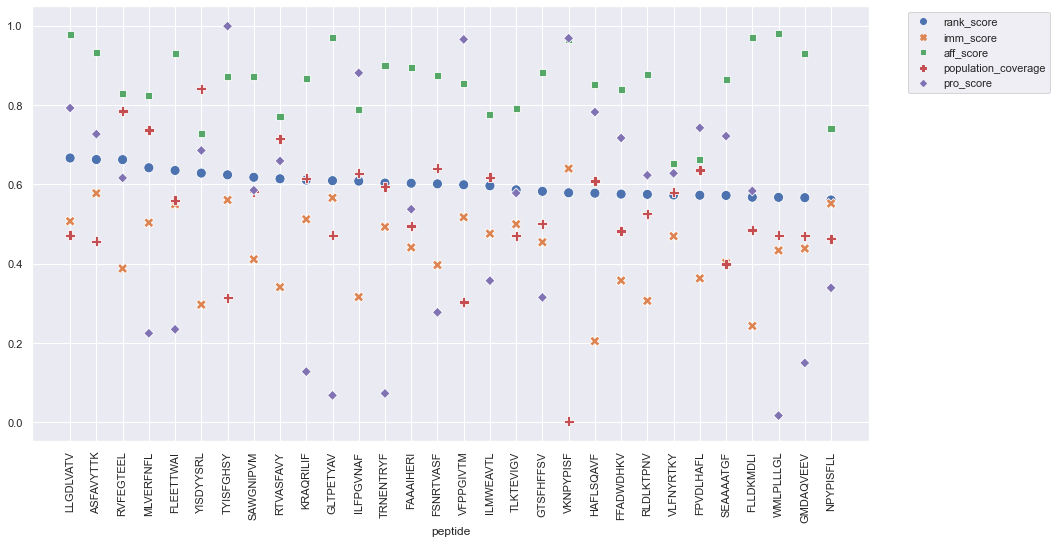

In [8]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=top_ep_scores, s=100)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

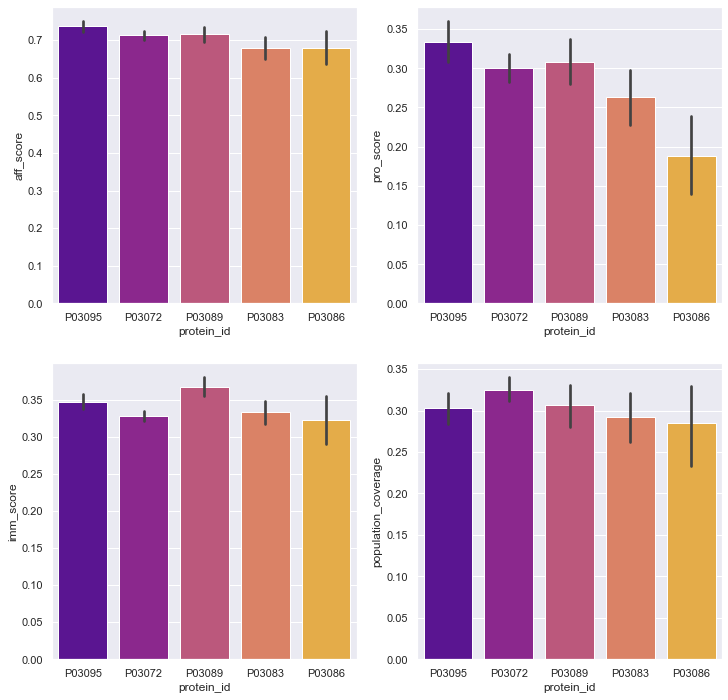

In [17]:
fig, axes = plt.subplots(2,2, figsize = (12, 12)) 

for param, ax in zip(rank_formula_features, axes.flatten()):
    sns.barplot(x ='protein_id', y =param, data = df,
            palette ='plasma', ax = ax)

<AxesSubplot:xlabel='protein_id', ylabel='rank_score'>

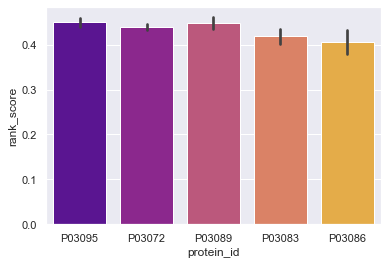

In [19]:
sns.barplot(x ='protein_id', y = 'rank_score', data = df,
            palette ='plasma')